# Wilks’ Theorem
 >__Created__:  12 Mar. 2018, Bhubaneswar, India, Harrison B. Prosper<br>
 >__Updated__:  24 Jun. 2018, updated for ESHEP 18, Maratea, Italy, HBP

In 1938, Wilks [1] established the following  

*Theorem* $-$
Consider two probability density functions (or, for discrete data, probability mass functions) $f(x \, | \, \theta_1, H_1)$ for hypothesis $H_1$ and $f(x \, | \, \theta_0, H_0)$ for hypothesis $H_0$, in which the parameters $\theta_0$ are a *subset* of the parameters $\theta_1$. (In our $pp \rightarrow H \rightarrow ZZ \rightarrow 4\ell$ example, $\theta_1 = s, b$, where $s$ and $b$ are the signal and background means in a counting experiment and $\theta_0 = b$.) Compute the ratio

$$\lambda = \frac{f(x \, | \, \hat{\theta}_0, H_0)}{f(x \, | \, \hat{\theta}_1, H_1)},$$

where $\hat{\theta}_0$ and $\hat{\theta}_1$ denote the maximum likelihood estimates (MLE) of 
$\theta_0$ and $\theta_1$, respectively.
If the dimensionality of $\theta_1$ is $n$ and that of $\theta_0$ is $m < n$ then, provided certain conditions are met and the null hypothesis $H_0$ is *true*, asymptotically, that is, as we accumulate more and more data, the probability density of 

$$t = -2 \ln \lambda,$$ 

converges to a $\chi^2$ density with $n-m$ degrees of freedom. In our example, $n = 2$ and $m = 1$, therefore, for this example the density of $t$ will approach a $\chi^2$ density with one degree of freedom.

A more operational way to state this theorem is as follows. Given a likelihood function $L(\theta, \nu)$ with parameters $\theta$ and $\nu$, maximize $L$ with respect to $\nu$, for a given $\theta$, and replace $\nu$ in $L$ by its estimate $\hat{\nu}(\theta)$. This yields a quantity $L_p(\theta)$ called the __profile likelihood__. Then, the density $p(t)$ of $t = -2 \ln L_p(\theta)/L_p(\hat{\theta})$ $\rightarrow$ $\chi^2$ density of $ndf = n - m$ degrees of freedom, which equals the dimensionality of the parameter vector $\theta$.

## Exercise

In this exercise, we consider the prototypical
likelihood, 

$$p(D \, |\, s, b ) = \frac{(s + b)^N \exp(-(s + b))}{N!} \, \frac{(kb)^M \exp(-kb)}{\Gamma(M+1)},$$

for an experiment that yields a *single* count $N$ in some signal region. The hypothesis $H_0$ is associated with a specific value of $s$, such as $s = 0$. The profile likelihood $L_p(s)$ is obtained by maximizing $L(s, b) \equiv p(D \,|\, s, b)$ with respect to the parameter of the hypothesis $H_0$, namely, $b$ and replacing the latter with

\begin{align*}
\hat{b}(s) & = \frac{g + \sqrt{g^2 + 4 (1 + k) M s}}{2(1 + k)},\textrm{ where}\\
g & = N + M - (1 + k) s.
\end{align*}

We simulate the density of 

\begin{align*}
t(s, \hat{s}) & = -2 \ln L_p(s) / L_p(\hat{s})
\end{align*}

and compare it to a $\chi^2$ density of one degree of freedom. Note that the peak of the profile likelihood necessarily occurs at the same place as the true likelihood function, namely, at 

\begin{align*}
\hat{s} & = N - M / k,\\
\hat{b} & = M / k.
\end{align*}

For simplicity, we assume that the scale factor $k$ is known with negligible uncertainty. For a clever exploitation of the Wald approximation, see Ref. [2]

### References
  1. Wilks, S. S., *The large-sample distribution of the likelihood ratio for testing composite hypotheses*, Ann. Math. Statist. __9__, 60-62 (1938).
  1. Cowan, G., Cranmer, K., Gross, E. *et al.* *Asymptotic formulae for likelihood-based tests of new physics* Eur. Phys. J. C 71, 1554 (2011). https://doi.org/10.1140/epjc/s10052-011-1554-0.

In [1]:
import os, sys
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as st
import matplotlib as mp
import matplotlib.pyplot as plt

# make plots appear inline
%matplotlib inline

In [2]:
# update fonts
font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 18
        }
mp.rc('font', **font)
# use if you have a full LaTeX installation
mp.rc('text', usetex=True)

# set a seed to ensure reproducibility 
# on a given machine
seed = 111
rnd  = np.random.RandomState(seed)

### CMS (Phys. Rev. D89, 092007 (2014)) $pp \rightarrow H \rightarrow ZZ \rightarrow 4\ell$.


In [3]:
N = 25           # observed events
B = 9.4          # estimated background (in signal region)
dB= 0.5          # background uncertainty
S = N - B        
M =(B / dB)**2   # effective count in background control region
k = M / B        # effective scale factor
s_hat = N - B    # maximum likelihood signal estimate
print("Effective background count (M):        %10.2f" % M)
print("Effectuve background scale factor (k): %10.2f" % k)
print("MLE signal estimate:                   %10.2f events" % s_hat)

Effective background count (M):            353.44
Effectuve background scale factor (k):      37.60
MLE signal estimate:                        15.60 events


### Compute profile likelihood $L_p(s) = p(D | s, \hat{b}(s))$
Write $L_p(s)$ so that there can be an implied loop over the counts $n$ and $m$; i.e., we follow the *numpy* array semantics.

In [4]:
def Lp(N, M, k, s):
    p = []
    for i, n, m in zip(range(len(N)), N, M):
        g = n + m - (1+k)*s
        b = g + np.sqrt(g*g+4*(1+k)*m*s)
        b /= 2*(1+k)
        p1 = st.gamma.pdf(s + b, n + 1)
        p2 = st.gamma.pdf(k*b, m + 1)
        p.append(p1*p2)
        if i % 1000 == 0: print("*", end='')
    print()
    if len(p) > 1:
        return np.array(p)
    else:
        return p[0]
    
def Lpmax(N, M, k, restrict=False):
    p = []
    for i, n, m in zip(range(len(N)), N, M):
        s_hat = n - float(m)/k
        if restrict:
            if s_hat < 0: s_hat = 0
        b_hat = m / k
        p1 = st.gamma.pdf(s_hat + b_hat, n + 1)
        p2 = st.gamma.pdf(m, m + 1)
        p.append(p1*p2)
        if i % 1000 == 0: print("o", end='')
    print()
    if len(p) > 1:
        return np.array(p)
    else:
        return p[0]

### Compute $\lambda(s) = L_P(s) / L_p(\hat{s})$ and $t_\textrm{obs}(s) = -2 \ln \lambda(s)$ for $s = 0$.

Note that $0 < \lambda(s) < 1$ and reaches its upper bound for $s = \hat{s}$. In effect, $\lambda(s)$ compares the likelihood of hypothesis $s$ to the hypothesis $\hat{s}$ which best agrees with the observation.

In [5]:
def t_test(N, M, k, s):
    L0 = Lp(N, M, k, s)
    L1 = Lpmax(N, M, k)
    t  = 2*np.log(L1 / L0)
    if len(N) > 0:
        return t
    else:
        return t[0]

### Simulation
In order to simulate the density of $t$, we need to decide what constitutes a repetition of the null experiment. We shall assume that $k$ is fixed as is the mean background $b$ and that a repetition of the null experiment yields the counts $N$ and $M$. Since these ensembles are purely fictional, there is no right or wrong fictional, i.e., virtual, ensemble, just different ones with which reasonable people can, and do, disagree about which if any is the most plausible for evaluating relevant quantities, e.g., systematic uncertainties and confidence levels! The point is that unlike ensembles in the real world, simulated ensembles are *hypothetical*. The problem of deciding which virtual ensemble to use is referred to as the *reference class problem*. 

  * Below we simulate $N_\textrm{exp} = 25,000$ experiments with given true values of $s = s_0$ and $b = b_0$.
  * __Investigate__:
    * Keep $s_0$ fixed, and try different values of $b_0$ starting around $b_0 = 1$. What happens? Does the density of $t(s)$ depend on the true value of $b_0$?
    * Keep $b_0$ fixed and vary $s_0$, but test $s = s_0$. Does the density depend on $s_0$?
    * Keep $b_0$ fixed, and test different values of $s$, which differ from its true value, $s_{0}$. What happens?

In [6]:
Nexp = 25000
s0 = 0.0    # true value of signal
b0 = B      # true value of background
n = st.poisson.rvs(s0 + b0, size=Nexp)
m = st.poisson.rvs(k*b0, size=Nexp)

### Plot distribution of simulated test statistic $t(s)$.
When the signal hypothesis under test matches the true mean signal, Wilks' theorem (1938), applied to the current problem, states that the density of $t(s, \hat{s})$ converges to $p(\chi^2, ndf=1)$ as the amount of data increases without limit (provided certain conditions are met), i.e., in the *asymptotic* limit. The approximation by Wald (1943), essentially that $t(s, s_0) \approx (s - \hat{s})^2/\sigma^2$ can be used to investigate hypotheses for which $s \neq s_0$. For such hypotheses, the asymptotic form of the density of $t(s, \hat{s})$ is a *noncentral $\chi^2$* density $p(\chi^2, ndf, nc)$, where $nc$ is called the *noncentrality* parameter. 

For this problem, the noncentrality parameter is given by
$$nc = t(s, s_0),$$ that is, by the test statistic when it is computed using an __Asimov__ dataset. An Asimov dataset is one for which the "observed" data are set to the true values. Consequently, for our example, the maximum likelihood estimate of the signal is replaced by its true value, i.e., $\hat{s} \rightarrow s_0$. The name of this special dataset is inspired by the short story *Franchise* by Isaac Asimov describing a futuristic United States in which, rather than having everyone vote in a general election, a single (presumably representative) person is chosen to answer a series of questions whose answers are analyzed by an AI system. The AI system then decides the outcome of the election by determining what would have been the outcome of the election if it had been held and all eligible voters voted! 

In [7]:
'''
t      test statistic
nc     noncentrality parameter (see below)
ndf    number of degrees of freedom
fgsize figure size
'''
def plot_t(t, fgfile='fig_wilks.png', nc=0, ndf=1, fgsize=(6, 6)):
    
    # set size of figure
    plt.figure(figsize=fgsize)

    # define ranges of plot
    x_range = (0, 16.0)
    y_range = (0,  1.0)
    
    # plot simulated normalized density of t(s, s_hat)
    v, x, q = plt.hist(t, 
                       bins=50,
                       range=x_range,
                       color=(0.2,0.7,0.5),
                       alpha=0.3,
                       density=True,
                       label=r'by simulation')
    plt.legend()

    xmin, xmax = x_range
    x = np.arange(xmin, xmax, 0.02)
    # plot noncentral chi2 density of 1 degree of freedom (ndf)
    y = st.ncx2.pdf(x, ndf, nc)
    plt.plot(x, y, 
             color=(1,0,0),
             linewidth=2,
             label=r'$p(\chi^2, 1, nc)$') 
    plt.legend()
      
    # plot chi2 density of 1 degree of freedom (ndf)
    y = st.chi2.pdf(x, ndf) # usual chi2 density
    plt.plot(x, y, 
             color=(0,0,1),
             linewidth=2,
             label=r'$p(\chi^2, 1)$') 
    plt.legend()
               
        
    # adjust y limits
    axes = plt.gca()
    axes.set_xlim(x_range)
    axes.set_ylim(y_range)
    axes.set_xlabel(r'$\chi^2$',  fontsize=30)
    axes.set_ylabel(r'$p(\chi^2)$', fontsize=30)
    
    xmin, xmax = axes.get_xlim()
    ymin, ymax = axes.get_ylim()
    xwid = (xmax-xmin)/10
    ywid = (ymax-ymin)/10
    
    # annotate
    xpos = 2*xwid
    ypos = 6*ywid
    plt.text(xpos, ypos, r'$t = -2 \ln \lambda(s, \hat{s})$',
             fontsize=24)
    plt.text(xpos, ypos-ywid, r'$\lambda(s, \hat{s}) = L_p(s) / L_p(\hat{s})$',
             fontsize=24)
    plt.savefig(fgfile)
    plt.show()

__Compute noncentrality parameter__

In [9]:
Asimov = [[s0+b0], [k*b0]]
s  = 5.0     # signal hypothesis to be tested
nc = t_test(Asimov[0], Asimov[1], k, s)
print('noncentrality parameter: %8.2f' % nc)

*
o
noncentrality parameter:     1.95


*************************
ooooooooooooooooooooooooo


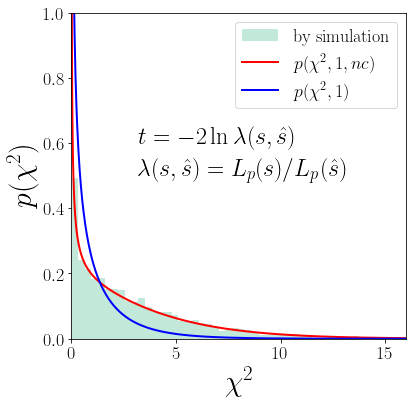

In [10]:
tnc= t_test(n, m, k, s)
plot_t(tnc, 'fig_wilks_noncentral.png', nc)

### Plot distribution of simulated test statistic $t(s)$ for the null hypothesis $s = s_0$.

*************************
ooooooooooooooooooooooooo


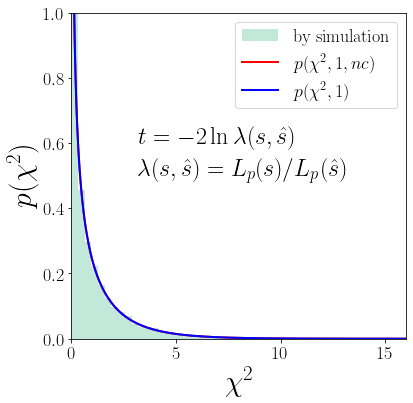

In [11]:
s = s0     # null hypothesis to be tested
tc= t_test(n, m, k, s)
plot_t(tc, 'fig_wilks_central.png')